#### Import Libraries (Pandas, Numpy, matplotlib & sklearn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

##### Read Data File, Colums check & Data Type check 

In [2]:
df = pd.read_csv('House Price India.csv')

In [3]:
df.head(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
df.shape

(14619, 23)

In [5]:
df.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

#### Simple Linear Regression with one input variable (Living Area)

In [6]:
df1 = df[['living area', 'Price']]

In [7]:
df1.head()

,living area,Price
0,2920,1400000
1,2910,1200000
2,3310,838000
3,2710,805000
4,2600,790000


In [8]:
df1.shape

(14619, 2)

##### Find & Remove Outliers for the regression model not to get influenced by outliers 

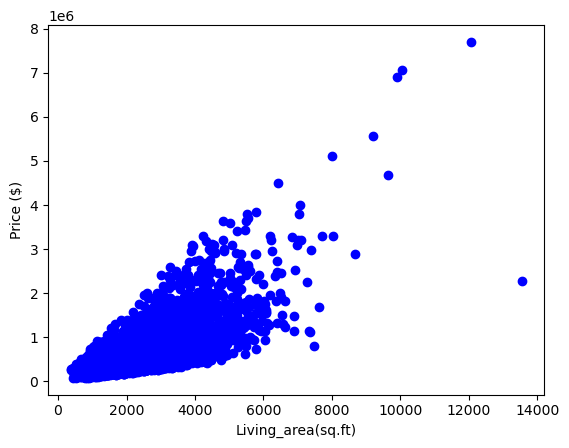

In [9]:
plt.xlabel('Living_area(sq.ft)')
plt.ylabel('Price ($)')
plt.scatter(df1['living area'], df1.Price, color = 'blue')

In [10]:
df2 = df1[(df1['living area']<=9000) & (df1['Price']<=5000000)]

In [11]:
df2.head()

,living area,Price
0,2920,1400000
1,2910,1200000
2,3310,838000
3,2710,805000
4,2600,790000


In [12]:
df2.shape

(14612, 2)

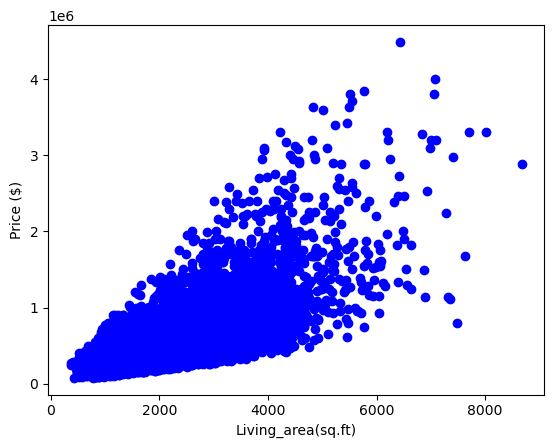

In [13]:
plt.xlabel('Living_area(sq.ft)')
plt.ylabel('Price ($)')
plt.scatter(df2['living area'], df2.Price, color = 'blue')

#### Linear Regression Model

In [14]:
model = linear_model.LinearRegression()
model.fit(df2[['living area']], df2.Price)

LinearRegression()

In [18]:
a = df2[df2['living area'] == 3400]
print('3400: ',model.predict([[3400]]))
print(a)

3400:  [888511.98912052]
       living area    Price
86            3400   830000
607           3400   660000
635           3400   464000
999           3400  1690000
1130          3400   712000
1303          3400   950000
1456          3400   475000
2225          3400   530000
3953          3400  1200000
5904          3400   799000
6600          3400   870000
6998          3400   688000
7858          3400  1050000
7965          3400   915000
10104         3400   825000
10672         3400   745000
10748         3400   865000
11094         3400   970000
11095         3400   970000
12344         3400  1300000
12825         3400   340000
13716         3400   828200


C:\Users\aksha\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


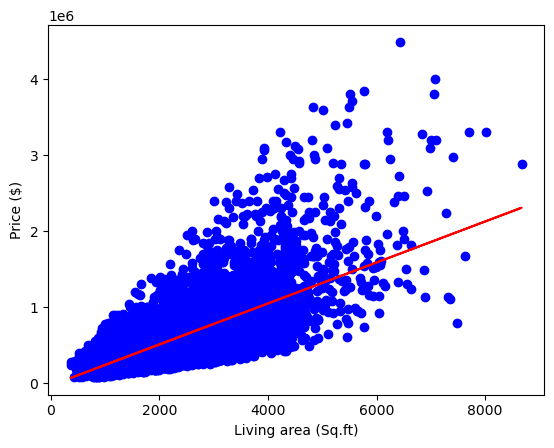

In [19]:
plt.xlabel('Living area (Sq.ft)')
plt.ylabel('Price ($)')
plt.scatter(df2['living area'], df2.Price, color = 'blue')
plt.plot(df2['living area'], model.predict(df2[['living area']]), color = 'red')